In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
data=load_diabetes()
dir(data)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [4]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df["Target"]=data.target

In [5]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [6]:
df.shape

(442, 11)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'Target'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [9]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [10]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


<AxesSubplot:xlabel='age', ylabel='Count'>

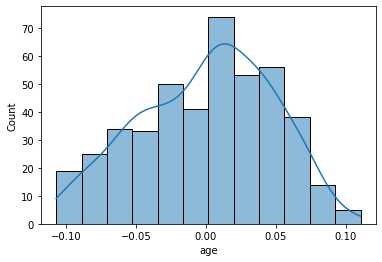

In [11]:
sns.histplot(df["age"],kde=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

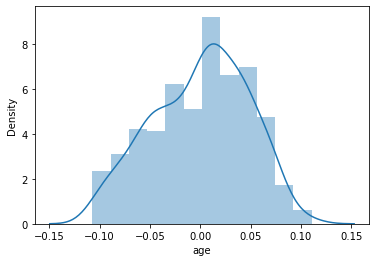

In [12]:
sns.distplot(df["age"],kde=True)

<AxesSubplot:>

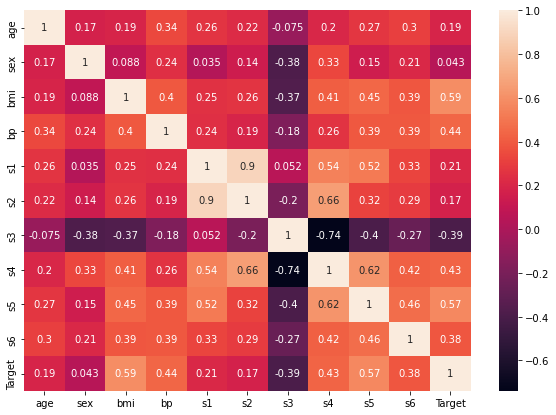

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

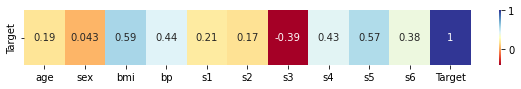

In [14]:
plt.figure(figsize=(10,1))
sns.heatmap(df.corr().iloc[-1:,:],annot=True,cmap="RdYlBu")

<Figure size 720x504 with 0 Axes>

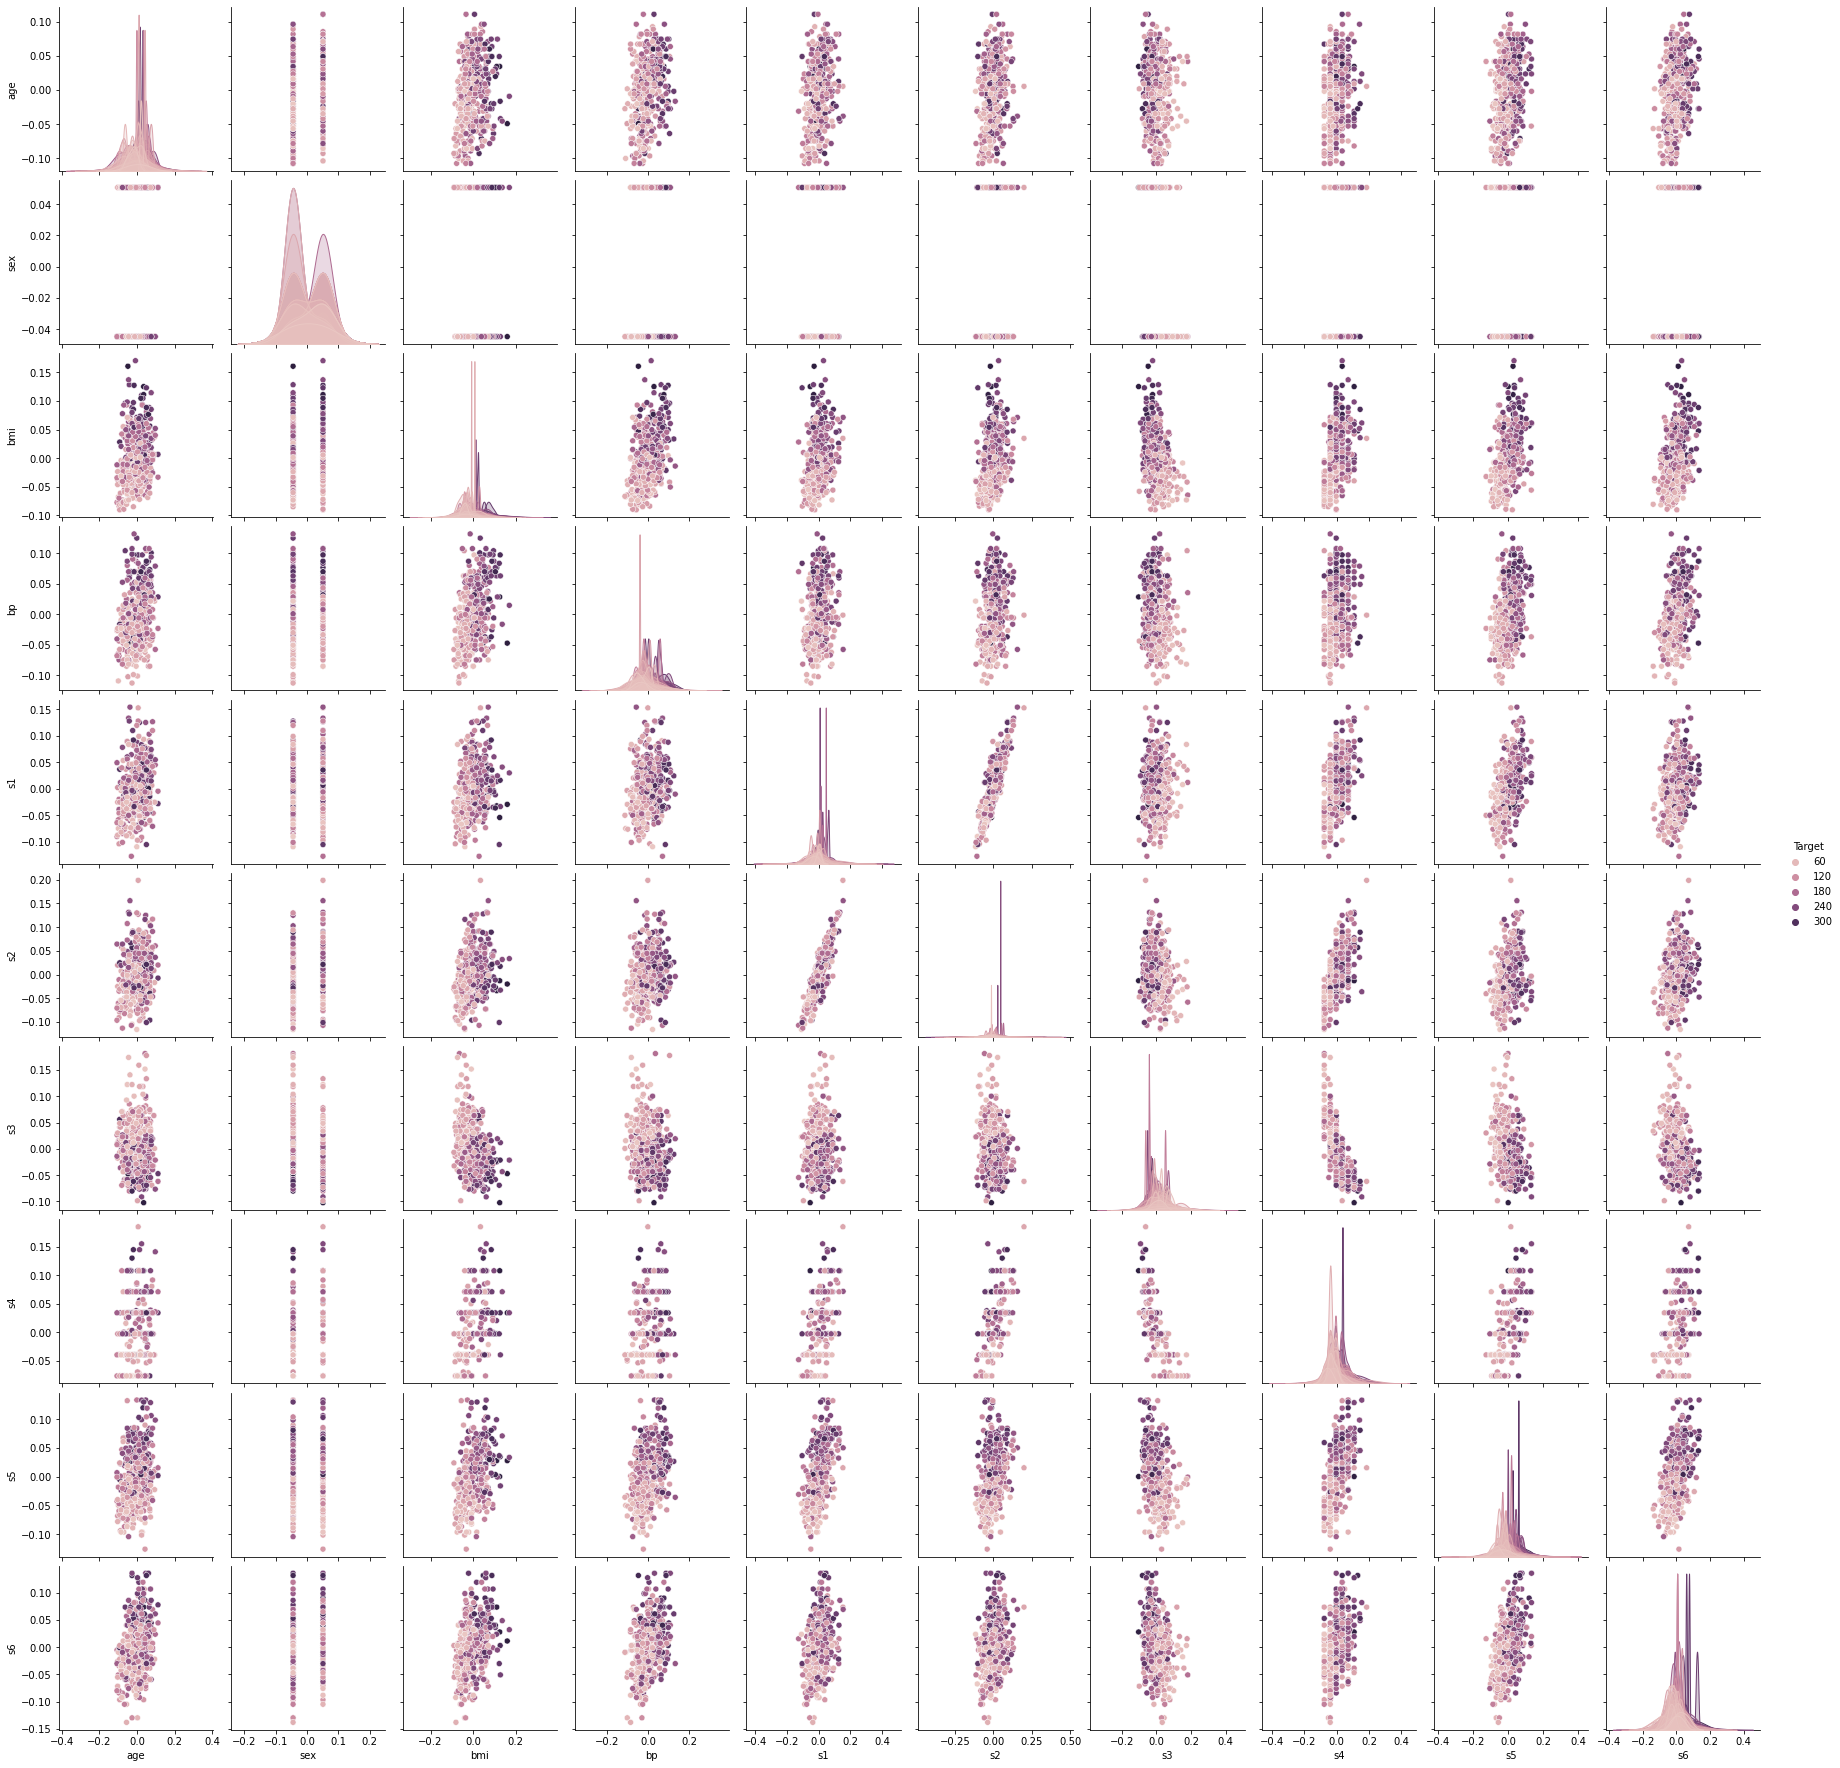

In [15]:
plt.figure(figsize=(10,7))
sns.pairplot(df,kind="scatter",hue="Target")

<AxesSubplot:xlabel='age', ylabel='s1'>

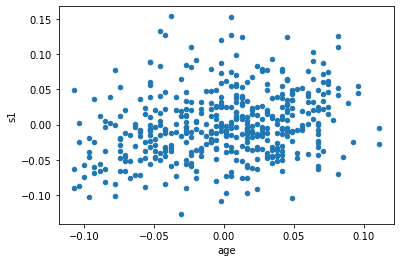

In [16]:
df.plot(x="age",y="s1",kind="scatter")

# spliting

In [65]:
x=df.drop("Target",axis=1)
y=df["Target"]

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# Model Training

In [19]:
reg_model=LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

## Testing Data Accuracy

In [20]:
y_pred_test=reg_model.predict(x_test)

MSE=mean_squared_error(y_test,y_pred_test)
print(f"Mean Square Error : {MSE}")
print("_"*50)
RMSE=np.sqrt(MSE)
print(f"Root Mean Square Error : {RMSE}")
print("_"*50)
MAE=mean_absolute_error(y_test,y_pred_test)
print(f"Mean Absolute Error : {MAE}")
print("_"*50)
R2_Score=r2_score(y_test,y_pred_test)
print(f"R2_Score of Model : {R2_Score}")

Mean Square Error : 2992.5576814529445
__________________________________________________
Root Mean Square Error : 54.70427480053953
__________________________________________________
Mean Absolute Error : 41.97487568546232
__________________________________________________
R2_Score of Model : 0.43843604017332694


## Traning Data Accuracy

In [21]:
y_pred_train=reg_model.predict(x_train)

MSE=mean_squared_error(y_train,y_pred_train)
print(f"Mean Square Error : {MSE}")
print("_"*50)
RMSE=np.sqrt(MSE)
print(f"Root Mean Square Error : {RMSE}")
print("_"*50)
MAE=mean_absolute_error(y_train,y_pred_train)
print(f"Mean Absolute Error : {MAE}")
print("_"*50)
R2_Score=r2_score(y_train,y_pred_train)
print(f"R2_Score of Model : {R2_Score}")

Mean Square Error : 2835.0355260719757
__________________________________________________
Root Mean Square Error : 53.245051658083455
__________________________________________________
Mean Absolute Error : 43.596851042184795
__________________________________________________
R2_Score of Model : 0.533228642689112


In [22]:
residuals=y_train - y_pred_train

## To check Normality

## kde plot

<AxesSubplot:xlabel='Target', ylabel='Density'>

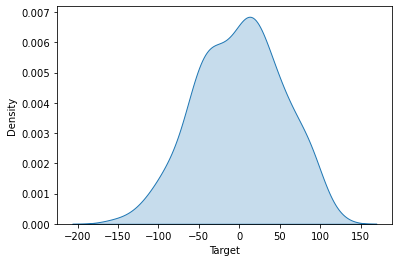

In [23]:
sns.kdeplot(residuals,fill=True)

## Histplot

<AxesSubplot:xlabel='Target', ylabel='Count'>

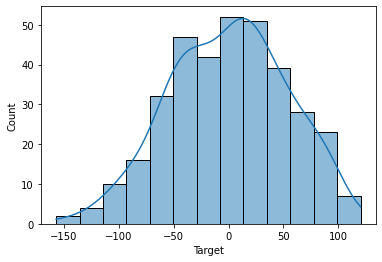

In [24]:
sns.histplot(residuals,kde=True)

## Hypothesis Technics

### shapiro Test

In [25]:
from scipy.stats import shapiro

In [26]:
stats,p_value=shapiro(residuals)

In [27]:
if p_value >= 0.05:
    print(f"P_Value : {p_value}")
    print("Data is normaly distributed")
else:
    print("Data is not normaly distributed")

P_Value : 0.09347343444824219
Data is normaly distributed


### ks test

In [28]:
from scipy.stats import kstest

In [29]:
stats,p_value=kstest(residuals,'norm')

In [30]:
if p_value >= 0.05:
    print(f"P_Value : {p_value}")
    print("Data is normaly distributed")
else:
    print("Data is not normaly distributed")

Data is not normaly distributed


### normal test

In [31]:
from scipy.stats import normaltest

In [32]:
stats,p_value=normaltest(residuals)
if p_value >= 0.05:
    print(f"P_Value : {p_value}")
    print("Data is normaly distributed")
else:
    print("Data is not normaly distributed")

P_Value : 0.07562288782359451
Data is normaly distributed


## QQ plot

In [33]:
import statsmodels.api as sm

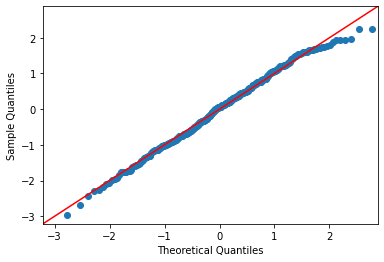

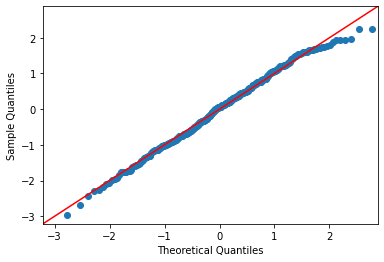

In [34]:
sm.qqplot(residuals,line="45",fit=True)

## skewness

In [35]:
from scipy.stats import skew

In [36]:
skew_val=skew(residuals)
skew_val

-0.14183214340559525

In [37]:
if skew_val >1:
    print("Highly positive skew data")
else:
    print("Highly negative skew data")

Highly negative skew data


# VIF(Variance Inflation Factor)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
for i in range(df.shape[1]-1):
    vif=variance_inflation_factor(df.to_numpy(),i)
    print(f"VIF for {df.columns[i]} is {vif}")

VIF for age is 1.2173152979408004
VIF for sex is 1.2830763497815814
VIF for bmi is 1.5329568756246912
VIF for bp is 1.4685838032150775
VIF for s1 is 59.25838473619974
VIF for s2 is 39.21415393791842
VIF for s3 is 15.403240473722954
VIF for s4 is 8.893713909753096
VIF for s5 is 10.125327711623958
VIF for s6 is 1.485020467461855


In [60]:
vif_list=[]
for i in range(df.shape[1]-1):
    vif=variance_inflation_factor(df.to_numpy(),i)
    vif_list.append(vif)

In [66]:
x1=pd.Series(vif_list)
x1.index=x.columns

<AxesSubplot:>

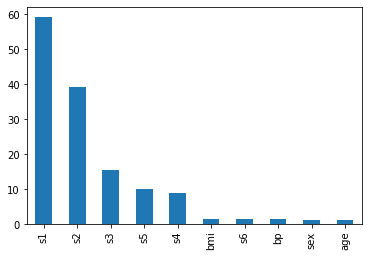

In [69]:
x1.sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:>

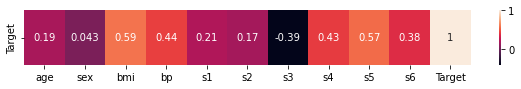

In [47]:
plt.figure(figsize=(10,1))
sns.heatmap(df.corr().iloc[-1:,:],annot=True)

# Lasso Regularization(L1 Regularization)

In [48]:
lasso_model=Lasso()
lasso_model.fit(x_train,y_train)

Lasso()

## Testing Data Accuracy

In [49]:
y_pred_test=lasso_model.predict(x_test)

MSE=mean_squared_error(y_test,y_pred_test)
print(f"Mean Square Error : {MSE}")
print("_"*50)
RMSE=np.sqrt(MSE)
print(f"Root Mean Square Error : {RMSE}")
print("_"*50)
MAE=mean_absolute_error(y_test,y_pred_test)
print(f"Mean Absolute Error : {MAE}")
print("_"*50)
R2_Score=r2_score(y_test,y_pred_test)
print(f"R2_Score of Model : {R2_Score}")

Mean Square Error : 3625.3673492415664
__________________________________________________
Root Mean Square Error : 60.211023486082404
__________________________________________________
Mean Absolute Error : 50.231123860724644
__________________________________________________
R2_Score of Model : 0.3196870833654353


## Traning Data Accuracy

In [50]:
y_pred_test=lasso_model.predict(x_train)

MSE=mean_squared_error(y_train,y_pred_train)
print(f"Mean Square Error : {MSE}")
print("_"*50)
RMSE=np.sqrt(MSE)
print(f"Root Mean Square Error : {RMSE}")
print("_"*50)
MAE=mean_absolute_error(y_train,y_pred_train)
print(f"Mean Absolute Error : {MAE}")
print("_"*50)
R2_Score=r2_score(y_train,y_pred_train)
print(f"R2_Score of Model : {R2_Score}")

Mean Square Error : 2835.0355260719757
__________________________________________________
Root Mean Square Error : 53.245051658083455
__________________________________________________
Mean Absolute Error : 43.596851042184795
__________________________________________________
R2_Score of Model : 0.533228642689112


# Hyperparameter

In [70]:
lasso=Lasso()
hyper_para={"alpha":np.arange(0.01,5,0.01)}
gscv_model=GridSearchCV(lasso,hyper_para,cv=5)
gscv_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       4.19, 4.2 , 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29,
       4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 ,
       4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5 , 4.51,
       4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62,
       4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73,
       4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84,
       4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94, 4.95,
       4.96, 4.97, 4.

In [71]:
gscv_model.best_estimator_

Lasso(alpha=0.04)

In [72]:
gscv_model.best_params_

{'alpha': 0.04}

# Model Traning

In [73]:
lasso_model=Lasso(alpha=0.04)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.04)

# Model Evaluation

## Testing Data Evaluation

In [74]:
y_pred_test=lasso_model.predict(x_test)

MSE=mean_squared_error(y_test,y_pred_test)
print(f"Mean Square Error : {MSE}")
print("_"*50)
RMSE=np.sqrt(MSE)
print(f"Root Mean Square Error : {RMSE}")
print("_"*50)
MAE=mean_absolute_error(y_test,y_pred_test)
print(f"Mean Absolute Error : {MAE}")
print("_"*50)
R2_Score=r2_score(y_test,y_pred_test)
print(f"R2_Score of Model : {R2_Score}")

Mean Square Error : 3026.555150497218
__________________________________________________
Root Mean Square Error : 55.014135915210176
__________________________________________________
Mean Absolute Error : 42.30010653876673
__________________________________________________
R2_Score of Model : 0.4320562956962488


## Training Data Evaluation

In [75]:
y_pred_test=lasso_model.predict(x_train)

MSE=mean_squared_error(y_train,y_pred_train)
print(f"Mean Square Error : {MSE}")
print("_"*50)
RMSE=np.sqrt(MSE)
print(f"Root Mean Square Error : {RMSE}")
print("_"*50)
MAE=mean_absolute_error(y_train,y_pred_train)
print(f"Mean Absolute Error : {MAE}")
print("_"*50)
R2_Score=r2_score(y_train,y_pred_train)
print(f"R2_Score of Model : {R2_Score}")

Mean Square Error : 2835.0355260719757
__________________________________________________
Root Mean Square Error : 53.245051658083455
__________________________________________________
Mean Absolute Error : 43.596851042184795
__________________________________________________
R2_Score of Model : 0.533228642689112
